# GRSW observations notebook

This notebook shows how to access the summary table of the observations data compiled for the GRSW workshop.
It require to pull a python package to access easily the data stored on [DACE](https://dace.unige.ch/dashboard/)

First we need to import the function needed for the notebook

In [1]:
from resonantstate.data_download  import get_metadata_observations, download_observations_samples
from resonantstate.analyse_samples import *
from resonantstate.ell2SFM import *
from resonantstate.simulations_resonance_analysis import *

## Data download

We can download the metatable to have a look on the available observations samples. The table will be returned in the form of a pandas DataFrame (df):

In [2]:
df_all_obs = get_metadata_observations()
df_all_obs.head()

,planet_name,star_name,analysis_id,author_name,contact_email,default,robustness,period_days,radius_planet_r_earth,mass_planet_m_earth,...,methods,instruments,transit_definition,bibtex,code_used,other_remarks,metadata_file,additional_info,readme_file,url_of_samples
0,K00972.02,K00972,0,Ragozzine,darin_ragozzine@byu.edu,1,-1,7.821838,1.040388,0.459848,...,photo-dynamics,Kepler,90.0,KMDC_TBD,PhoDyMM,See README.txt for more information.,https://dace.unige.ch/downloads/resonant_state...,,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
1,K00972.01,K00972,0,Ragozzine,darin_ragozzine@byu.edu,1,-1,13.119837,3.228469,0.064462,...,photo-dynamics,Kepler,90.0,KMDC_TBD,PhoDyMM,See README.txt for more information.,https://dace.unige.ch/downloads/resonant_state...,,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
2,K01239.01,K01239,0,Ragozzine,darin_ragozzine@byu.edu,1,-1,0.783274,1.454645,7.688309,...,photo-dynamics,Kepler,90.0,KMDC_TBD,PhoDyMM,See README.txt for more information.,https://dace.unige.ch/downloads/resonant_state...,,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
3,K01239.02,K01239,0,Ragozzine,darin_ragozzine@byu.edu,1,-1,3.174604,1.488855,8.795811,...,photo-dynamics,Kepler,90.0,KMDC_TBD,PhoDyMM,See README.txt for more information.,https://dace.unige.ch/downloads/resonant_state...,,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
4,K01884.02,K01884,0,Ragozzine,darin_ragozzine@byu.edu,1,-1,4.781612,0.809116,2.257537,...,photo-dynamics,Kepler,90.0,KMDC_TBD,PhoDyMM,See README.txt for more information.,https://dace.unige.ch/downloads/resonant_state...,,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...


We can have a look on the available columns:

In [3]:
df_all_obs.head(0).T

""
planet_name
star_name
analysis_id
author_name
contact_email
default
robustness
period_days
radius_planet_r_earth
mass_planet_m_earth


Let's look at the list of analysed systems:

In [4]:
df_all_obs["star_name"].unique()

array(['K00972', 'K01239', 'K01884', 'K02093', 'K02357', 'K02421',
       'K02449', 'K02554', 'K02610', 'K02696', 'K02840', 'K02949',
       'K02972', 'K03029', 'K03083', 'K03111', 'K03196', 'K03209',
       'K03340', 'K03341', 'K03395', 'K03401', 'K03420', 'K03462',
       'K03495', 'K04021', 'K04136', 'K04149', 'K04287', 'K04307',
       'K04421', 'K04435', 'K04504', 'K04526', 'K04535', 'K04541',
       'K04567', 'K04577', 'K04647', 'K04657', 'K04700', 'K04773',
       'K04782', 'K04846', 'K04871', 'K04896', 'K04913', 'K05007',
       'K06093', 'K06103', 'K06120', 'K06178', 'K06182', 'K06191',
       'K06209', 'K06245', 'K06259', 'K06355', 'K07117', 'K07685',
       'K2-266', 'Kepler-10', 'Kepler-100', 'Kepler-1006', 'Kepler-101',
       'Kepler-1010', 'Kepler-1014', 'Kepler-102', 'Kepler-103',
       'Kepler-1038', 'Kepler-104', 'Kepler-1042', 'Kepler-1047',
       'Kepler-105', 'Kepler-1050', 'Kepler-1052', 'Kepler-1056',
       'Kepler-106', 'Kepler-1065', 'Kepler-1067', 'Kepler-1

Lets keep only the analysis of one of the systems:

In [5]:
target = "Kepler-128"

df_selected = df_all_obs[df_all_obs["star_name"].isin([target])]
df_selected.head(100)

,planet_name,star_name,analysis_id,author_name,contact_email,default,robustness,period_days,radius_planet_r_earth,mass_planet_m_earth,...,methods,instruments,transit_definition,bibtex,code_used,other_remarks,metadata_file,additional_info,readme_file,url_of_samples
325,Kepler-128 b,Kepler-128,0,Hadden,shadden1107@gmail.com,1,0,15.087899,1.461209,0.808143,...,extracted times,Kepler,z+,2017AJ....154....5H,2014ApJ...787..132D,"Last column value, dt, specifies initial condi...",https://dace.unige.ch/downloads/resonant_state...,,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
326,Kepler-128 c,Kepler-128,0,Hadden,shadden1107@gmail.com,1,0,22.805729,1.325409,0.939498,...,extracted times,Kepler,z+,2017AJ....154....5H,2014ApJ...787..132D,"Last column value, dt, specifies initial condi...",https://dace.unige.ch/downloads/resonant_state...,,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
327,Kepler-128 b,Kepler-128,1,Hadden,shadden1107@gmail.com,0,0,15.088067,1.461209,4.991414,...,extracted times,Kepler,z+,2017AJ....154....5H,2014ApJ...787..132D,"Last column value, dt, specifies initial condi...",https://dace.unige.ch/downloads/resonant_state...,,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
328,Kepler-128 c,Kepler-128,1,Hadden,shadden1107@gmail.com,0,0,22.805290,1.325409,6.112953,...,extracted times,Kepler,z+,2017AJ....154....5H,2014ApJ...787..132D,"Last column value, dt, specifies initial condi...",https://dace.unige.ch/downloads/resonant_state...,,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
329,Kepler-128 b,Kepler-128,2,Leleu,adrien.leleu@unige.ch,0,1,15.086323,1.415475,3.653026,...,photo-dynamics,Kepler,z+,2023A&A...669A.117L,2023A&A...669A.117L,,https://dace.unige.ch/downloads/resonant_state...,,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
330,Kepler-128 c,Kepler-128,2,Leleu,adrien.leleu@unige.ch,0,1,22.809446,1.517008,3.257087,...,photo-dynamics,Kepler,z+,2023A&A...669A.117L,2023A&A...669A.117L,,https://dace.unige.ch/downloads/resonant_state...,,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
331,Kepler-128 b,Kepler-128,3,Leleu,adrien.leleu@unige.ch,0,1,15.086333,1.428079,4.278010,...,photo-dynamics,Kepler,z+,2023A&A...669A.117L,2023A&A...669A.117L,,https://dace.unige.ch/downloads/resonant_state...,,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
332,Kepler-128 c,Kepler-128,3,Leleu,adrien.leleu@unige.ch,0,1,22.809446,1.528149,3.798313,...,photo-dynamics,Kepler,z+,2023A&A...669A.117L,2023A&A...669A.117L,,https://dace.unige.ch/downloads/resonant_state...,,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
333,Kepler-128 b,Kepler-128,4,Leleu,adrien.leleu@unige.ch,1,1,15.086336,1.420195,3.729383,...,photo-dynamics,Kepler,z+,2023A&A...669A.117L,2023A&A...669A.117L,,https://dace.unige.ch/downloads/resonant_state...,,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
334,Kepler-128 c,Kepler-128,4,Leleu,adrien.leleu@unige.ch,1,1,22.809431,1.518702,3.321343,...,photo-dynamics,Kepler,z+,2023A&A...669A.117L,2023A&A...669A.117L,,https://dace.unige.ch/downloads/resonant_state...,,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...


We can look at the different mass priors used in the analyses:

In [6]:
df_selected['mass_prior']

325    log-uniform
326    log-uniform
327        uniform
328        uniform
329    log-uniform
330    log-uniform
331        uniform
332        uniform
333    log-uniform
334    log-uniform
335        uniform
336        uniform
Name: mass_prior, dtype: object

Let's download the samples from these systems. If a path is given, it saves the samples into the given directory.

In [7]:
#download_destination_path = "downloaded_observtions_samples/"
download_destination_path = None
df_list = download_observations_samples(df_selected, download_destination_path)

The downloaded samples are returned as a list. Each element of the list is a dictionnary containing informations on the downloaded sample and the sample itself. 

Looking at the first element of the list, we can see its structure:

In [8]:
for k,v in df_list[0].items():
    if k == "samples":
        print(f"{k}:\t...")
    else:
        print(f"{k}:\t{v}")

samples_name:	Kepler-128_0
planets_list:	['Kepler-128 b', 'Kepler-128 c']
samples:	...
readme:	Last column value, 'dt', specifies initial condition date as 'BJD 2454900+dt'

additional_info:	None
author_name:	Hadden
star_name:	Kepler-128
analysis_id:	0
contact_email:	shadden1107@gmail.com
default:	1
robustness:	0
initial_condition_date_BJD:	-1.0
nb_planets:	2
gaia_id:	Gaia DR2 2105318412166111232
mass_prior:	log-uniform
eccentricity_prior:	uniform
transit_definition:	z+
methods:	extracted times
instruments:	Kepler
bibtex:	2017AJ....154....5H
code_used:	2014ApJ...787..132D
other_remarks:	Last column value, dt, specifies initial condition date as BJD 2454900+dt


Let's have a look at the samples from the first analysis:

In [9]:
df = df_list[0]['samples']
df.head()

,sample_index,mean_longitude_deg_0,period_days_0,k_0,h_0,inclination_deg_0,longitude_of_ascending_node_deg_0,mass_planet_star_ratio_0,radius_planet_star_ratio_0,mean_longitude_deg_1,period_days_1,k_1,h_1,inclination_deg_1,longitude_of_ascending_node_deg_1,mass_planet_star_ratio_1,radius_planet_star_ratio_1,mass_star_m_sun,radius_star_r_sun,BJD2454900+dt
0,0.0,54.0,15.087805,-0.070867,-0.051585,90.0,0.0,0.000005,0.00807,302.739142,22.805533,-0.022760,-0.063253,90.0,0.0,0.000008,0.00732,1.18,1.66,76.899626
1,1.0,54.0,15.087788,-0.134095,0.125742,90.0,0.0,0.000001,0.00807,296.984909,22.805926,-0.005105,-0.005545,90.0,0.0,0.000002,0.00732,1.18,1.66,76.670609
2,2.0,54.0,15.087959,-0.086533,0.065153,90.0,0.0,0.000001,0.00807,294.937435,22.805765,0.037473,-0.073900,90.0,0.0,0.000001,0.00732,1.18,1.66,76.866486
3,3.0,54.0,15.087717,0.020024,-0.022480,90.0,0.0,0.000003,0.00807,297.583885,22.806408,0.078544,-0.083465,90.0,0.0,0.000003,0.00732,1.18,1.66,77.351135
4,4.0,54.0,15.088269,-0.758280,-0.136253,90.0,0.0,0.000002,0.00807,307.305671,22.805606,-0.474529,-0.147305,90.0,0.0,0.000002,0.00732,1.18,1.66,73.663586


You can save the dataframe of this sample as a csv file for future analysis:

In [10]:
#destination_path = 'your_path_to_file/'
#sample_name = df_list[0]['sample_name'] 
#filename = destination_path + sample_name + '.csv'
#df.to_csv(filename, index=False)

Let's say you want to plot a mass-period diagram for a planet. You can directly extract each column from the header of the dataframe. Remember that planet indexing starts from 0.

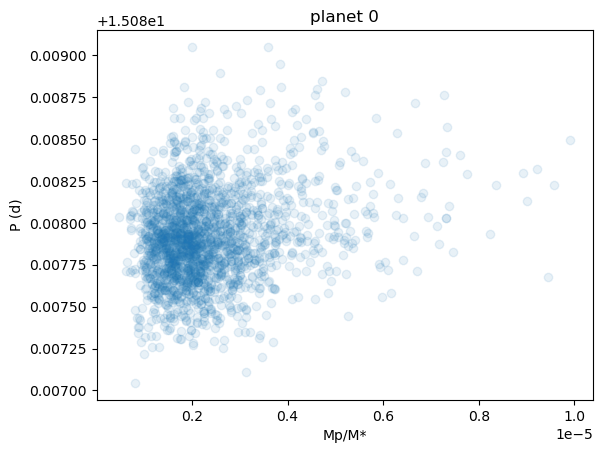

In [11]:
n_planet = 0

mass = df[f'mass_planet_star_ratio_{n_planet}']
period = df[f'period_days_{n_planet}']

plt.figure()
plt.scatter(mass, period, alpha=0.1)
plt.xlabel('Mp/M*')
plt.ylabel('P (d)')
plt.title(f'planet {n_planet}')
plt.show()

Now try plotting the mass-eccentricity diagram:

## Analysis part 1: Simple plots

Perhaps you might be more interested in comparing the samples for each planet across different analyses.

We have prepared a few useful functions to make histograms and scatter plots of the different parameters. These functions loop over each analysis in your selected list of dictionaries and creates separate subplots for each planet, allowing you to compare the samples for each planet across different analyses.

You can directly plot the following parameters:
- **"period"**      (in days)
- **"k"**           (ecos(varpi))
- **"h"**           (esin(varpi))
- **"incl"**        (inclination in deg)
- **"omega"**       (longitude of ascending node in deg)
- **"mass"**        (in stellar mass)
- **"radius"**      (in stellar radii)
- **"lambda"**      (mean longitude in deg)

You can also extract the following derived parameters:
- **"ecc"**         (eccentricity)
- **"varpi"**       (longitude of pericenter in deg)
- **"density"**     (in stellar density)

We can have a look at the total of planets included in our list of dictionaries:

In [12]:
planets = get_all_planets(df_list)
planets

['kepler-128 b', 'kepler-128 c']

Let's first make histograms comparing the *mass posteriors* for each planet.

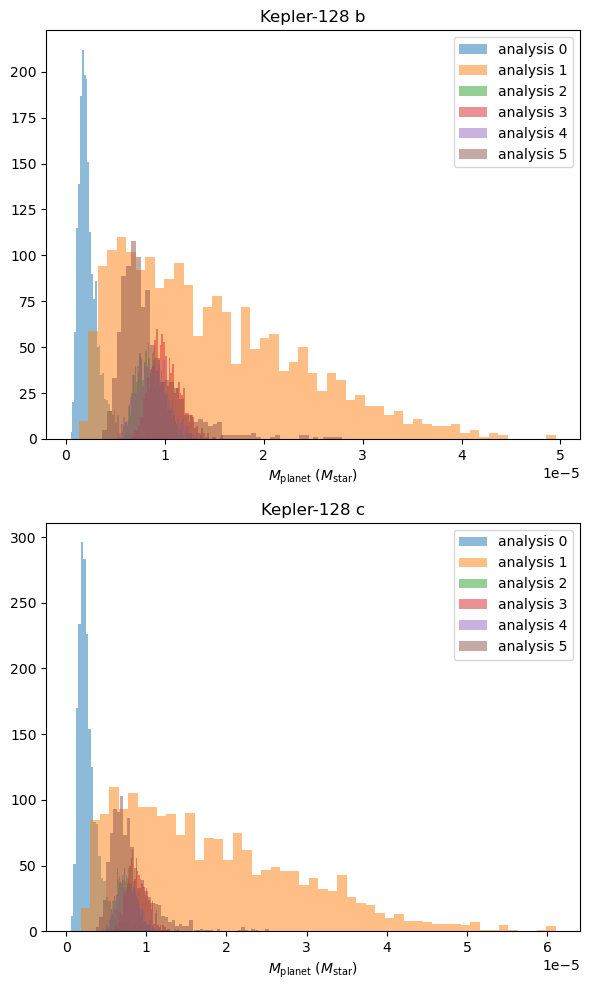

In [13]:
plot_histograms(df_list, param='mass', units='star')

Let's convert the units to something more intuitive.

Valid units are: **"star"** (default), **"sun"**, **"earth"**, **"jup"**, or **"SI"**

Unit conversion applies to parameters *"mass"*, *"radius"*, or *"density"*

Try changing the units in the above histograms.

Let's now make scatter plots of the different parameters. 

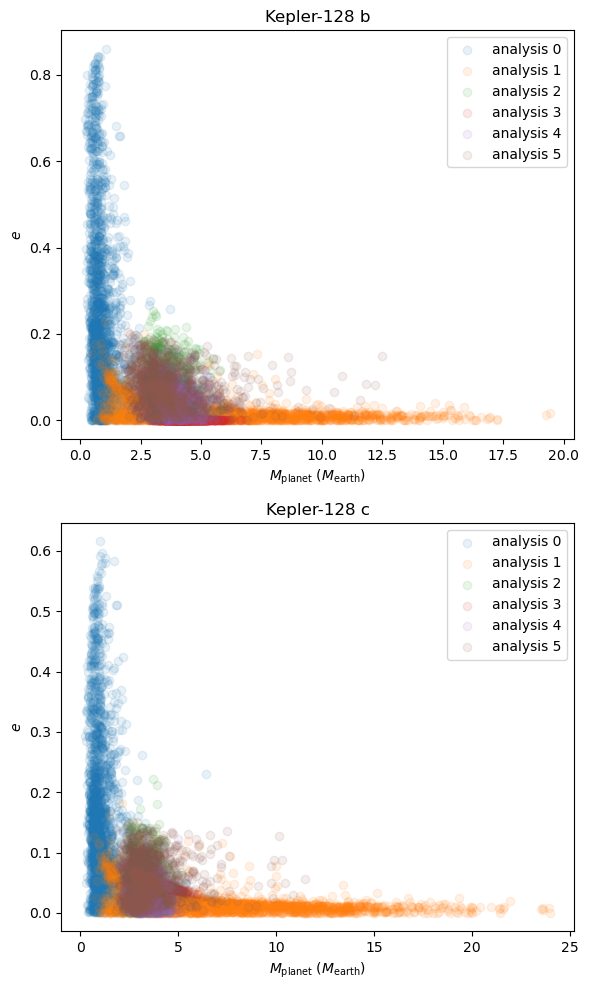

In [14]:
plot_samples(df_list, x_param='mass', y_param='ecc', units='earth')

Try plotting the **period-density** diagrams with the density in **SI units**:

In [15]:
#plot_samples()

We might also be interested in the posterior distributions of **consecutive planets**:

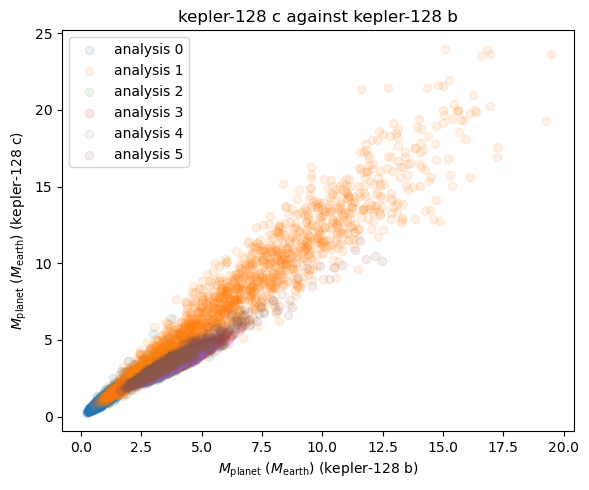

In [16]:
plot_adjacent_planets(df_list, 
                      param='mass', 
                      planet_pair=planets[0:2],
                      units='earth')

We can also compare the **period ratios** between adjacent planets:

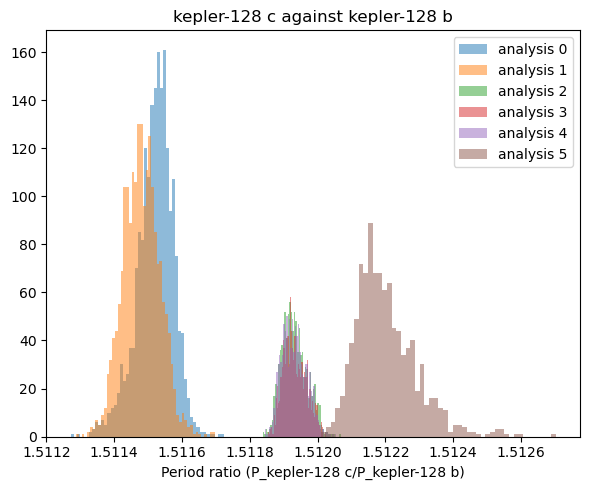

In [17]:
compare_period_ratios(df_list, planet_pair=planets[0:2])

Let's now look at the **Kepler-80 system**. Search and download the samples into a list of dictionaries as before.

In [18]:
target2 = 'Kepler-80'

#df_selected2 = ...

Have a go at visualising the different parameters of the samples as before.

In [ ]:
# your plots here...

### Analysis part 2: Second Fundamental Model of Resonance

For the next part we will be plotting the elliptic elements of one system into the *Second Fundamental Model* of resonance. These functions are intended for planet pairs in **first-order** mean motion resonance. 

Let's start by looking at one set of analysis. You can visualize the available pairs of planets in first-order resonance with the following function:

Found 1 first order pairs.
Pairs: [[0, 1]]
Resonances: [2]
pair [0, 1] : 0.0 % within resonance.


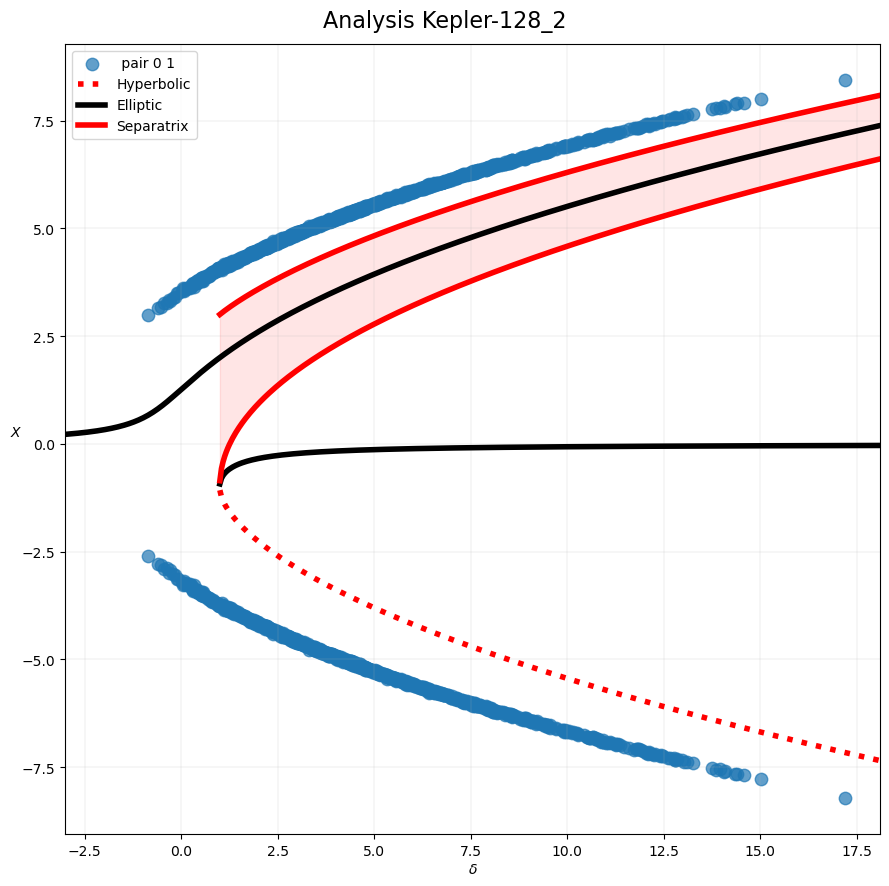

(<Figure size 900x900 with 1 Axes>, <Axes: xlabel='$\\delta$', ylabel='$X$'>)

In [20]:
df_dict = df_list[2]

plot_ell2SFM(df_dict)   # takes dictionary or dataframe or numpy array

Instead of plotting the samples with a solid colour, you can also give a numpy array of values such as the masses:

Found 1 first order pairs.
Pairs: [[0, 1]]
Resonances: [2]
pair [0, 1] : 0.0 % within resonance.


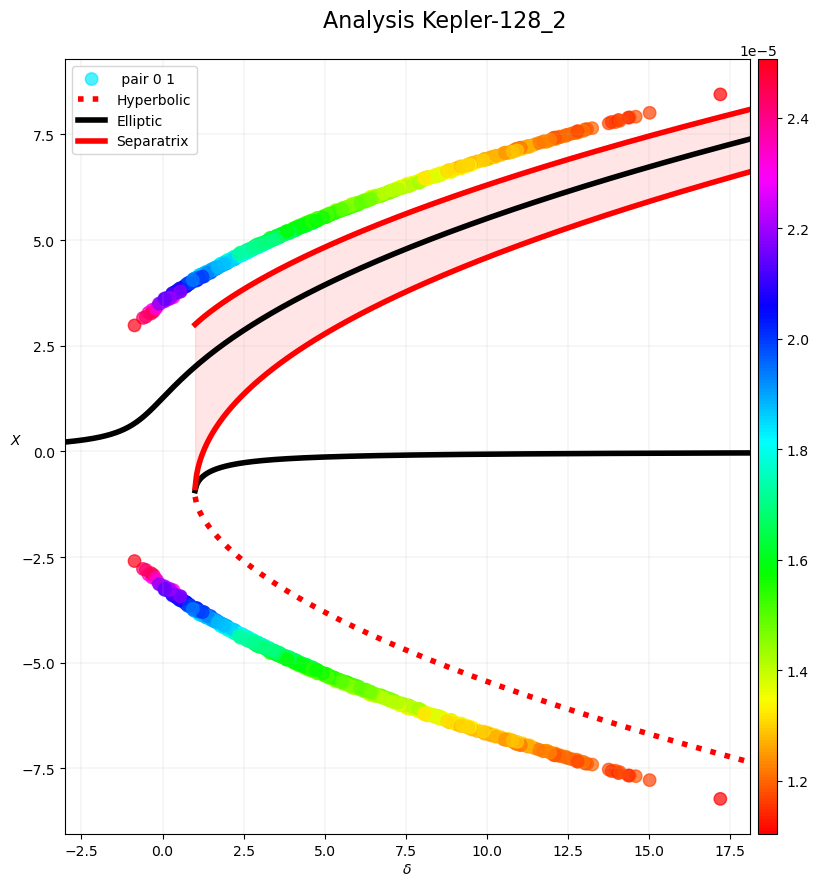

(<Figure size 900x900 with 2 Axes>, <Axes: xlabel='$\\delta$', ylabel='$X$'>)

In [21]:
import pandas as pd

samples = df_dict['samples']

total_mass1 = pd.Series.to_numpy(samples['mass_planet_star_ratio_0'] + samples['mass_planet_star_ratio_1'])
min_mass, max_mass = total_mass1.min(), total_mass1.max()

plot_ell2SFM(df_dict, colors=[total_mass1], color_lim=(min_mass, max_mass))

Here is an example visualising more than one pair of planets in a system:

Found 2 first order pairs.
Pairs: [[0, 1], [1, 2]]
Resonances: [4, 3]
pair [0, 1] : 100.0 % within resonance.
pair [1, 2] : 100.0 % within resonance.


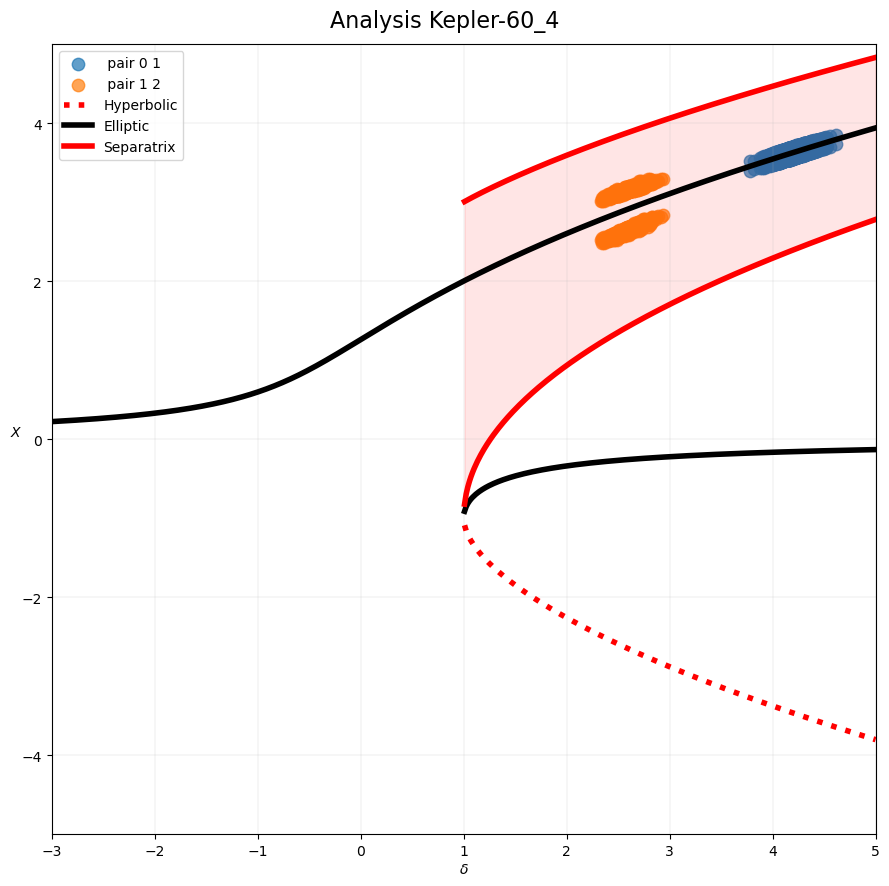

(<Figure size 900x900 with 1 Axes>, <Axes: xlabel='$\\delta$', ylabel='$X$'>)

In [22]:
target3 = "Kepler-60"

df_selected3 = df_all_obs[df_all_obs["star_name"].isin([target3])]
df_list3 = download_observations_samples(df_selected3)

plot_ell2SFM(df_list3[4])

You can also give numpy arrays such as masses to more than one pair of planets. The colormap scales automatically unless otherwise specified.

Found 2 first order pairs.
Pairs: [[0, 1], [1, 2]]
Resonances: [4, 3]
pair [0, 1] : 100.0 % within resonance.
pair [1, 2] : 100.0 % within resonance.


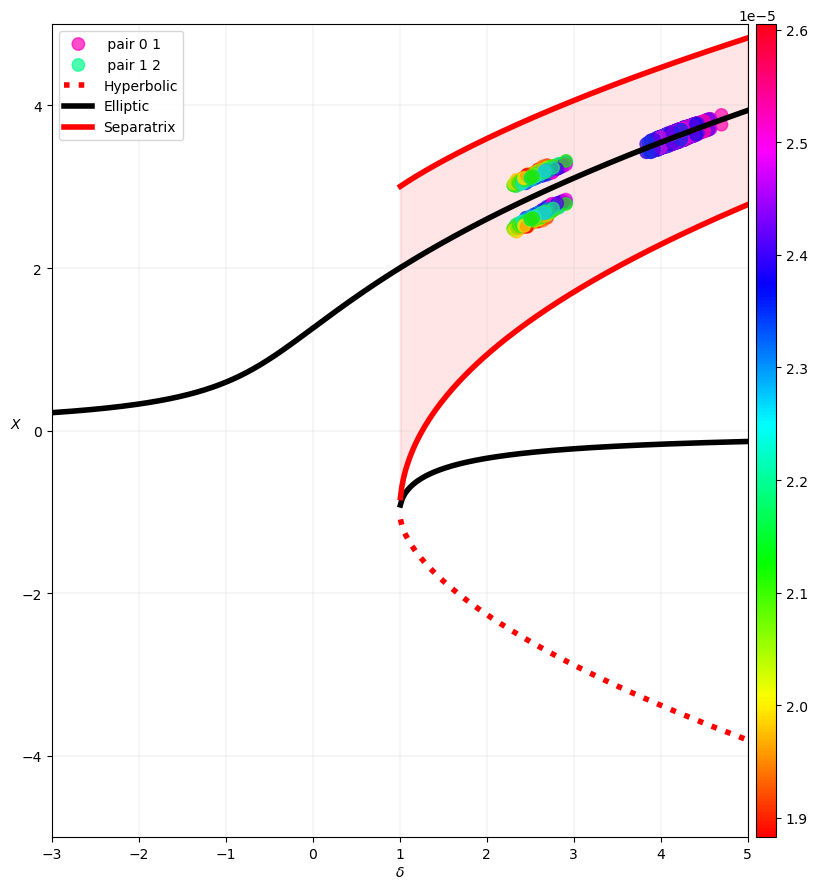

(<Figure size 900x900 with 2 Axes>, <Axes: xlabel='$\\delta$', ylabel='$X$'>)

In [23]:
samples3 = df_list3[2]['samples']

total_mass1 = pd.Series.to_numpy(samples3['mass_planet_star_ratio_0'] + samples3['mass_planet_star_ratio_1'])
total_mass2 = pd.Series.to_numpy(samples3['mass_planet_star_ratio_1'] + samples3['mass_planet_star_ratio_2'])

plot_ell2SFM(samples3, colors=[total_mass1, total_mass2])

You can use the following space to explore samples from the Kepler-80 analyses dictionary you downloaded before.

In [ ]:
# your plots here...